<a href="https://colab.research.google.com/github/mortezaaghajanzadeh/Machine-learning-in-Finance/blob/main/Lecture%202/introduction_to_deep_learning_lecture_2_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 2: Introduction to Deep Learning.**
### Example: train a model in TensorFlow to fit recovery rate date on assets using a triangular distribution.

In [5]:
# Import libraries.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Simulate recovery rates.

In [6]:
# Simulate recovery rate data.
np.random.seed(58)
n = 500

# Set true values pf parameters.
a, b, c = 0.0, 0.2, 1.0
data = np.random.triangular(a, b, c, n)

## Visualize data.

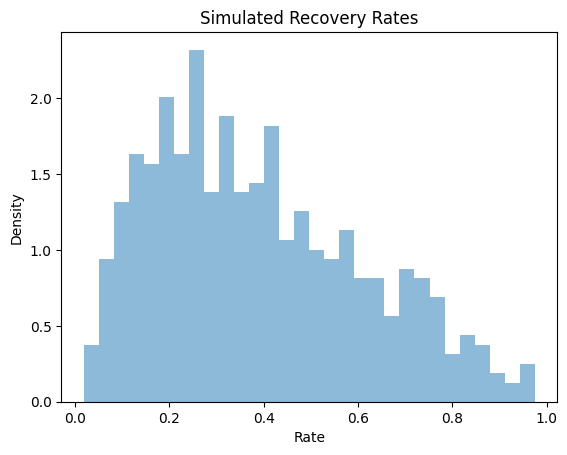

In [7]:
# Plot histogram.
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.title('Simulated Recovery Rates')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.show()

## Define trainable variables for triangular distribution.

In [8]:
# Define trainable parameters for the triangular distribution
a_hat = tf.Variable(np.min(data), name='a', dtype=tf.float32)
b_hat = tf.Variable(np.mean(data), name='b', dtype=tf.float32)
c_hat = tf.Variable(np.max(data), name='c', dtype=tf.float32)

## Define loss function and optimizer.

In [9]:
# Define the loss function (negative log likelihood)
def nll_loss():
    # Compute the probability density function of the triangular distribution
    pdf_values = tf.where(
        data < b_hat,
        2 * (data - a_hat) / ((b_hat - a_hat) * (c_hat - a_hat)),
        2 * (c_hat - data) / ((c_hat - b_hat) * (c_hat - a_hat))
    )
    # Add a small constant to avoid taking log(0)
    log_likelihood = tf.math.log(pdf_values + 1e-6)
    return -tf.reduce_mean(log_likelihood)

In [10]:
# Instantiate optimizer.
optimizer = tf.optimizers.Adam(learning_rate=0.01)

## Train model.

In [11]:
# Training loop.
for epoch in range(500):
    # Use the minimize method, which computes gradients and applies them
    optimizer.minimize(nll_loss, var_list=[a_hat, b_hat, c_hat])
    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss: {nll_loss().numpy()}')

Epoch 0: Loss: -0.08640243113040924
Epoch 50: Loss: -0.17052645981311798
Epoch 100: Loss: -0.17043450474739075
Epoch 150: Loss: -0.1705389767885208
Epoch 200: Loss: -0.17066238820552826
Epoch 250: Loss: -0.17080269753932953
Epoch 300: Loss: -0.17095910012722015
Epoch 350: Loss: -0.17112979292869568
Epoch 400: Loss: -0.17131344974040985
Epoch 450: Loss: -0.1715097278356552


## Plot fitted distribution.

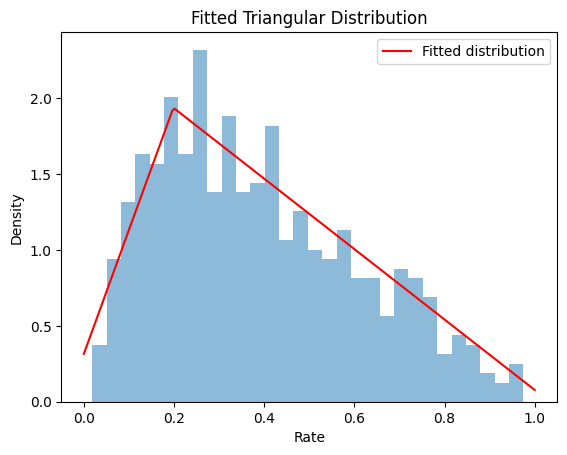

In [12]:
# Plot the fitted distribution against data.
x = np.linspace(0, 1, 200)
pdf = tf.where(
    x < b,
    2 * (x - a_hat) / ((b_hat - a_hat) * (c_hat - a)),
    2 * (c_hat - x) / ((c_hat - b) * (c_hat - a))
)

plt.hist(data, bins=30, density=True, alpha=0.5)
plt.plot(x, pdf, label='Fitted distribution', color='red')
plt.title('Fitted Triangular Distribution')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

## Print parameter estimates.

In [13]:
# Output the estimated parameters
print(f"Estimated a (min): {a_hat.numpy()}")
print(f"Estimated b (mode): {b_hat.numpy()}")
print(f"Estimated c (max): {c_hat.numpy()}")

Estimated a (min): -0.03857438266277313
Estimated b (mode): 0.1982359141111374
Estimated c (max): 1.0333552360534668
